## NETFLIX - DATA EXPLORATION AND VISUALISATION

Problem Statement:

*   Netflix is one of the largest OTT platform worldwide.It lets movies and shows accessible to its sunscribers without any language barrier. At the same time its a bussiness with crores of turnover. Hence it is important to find and forecast the type of content people are actually willing to watch. So we should do the analyse the data given and get insights that help Netflix to grow better.

Importing the required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install pandas_profiling

In [ ]:
from ydata_profiling import ProfileReport

# Downloading the Netflix Dataset

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 23.9MB/s]


In [ ]:
netflix_df=pd.read_csv('netflix.csv')
print('Data Set read successfully')

Data Set read successfully


Analysing basic metrics of the Netflix Dataset

In [ ]:
#deep copy of the dataset

df=netflix_df.copy()

In [ ]:
df.shape

(8807, 12)

Observation:

There are 8807 unique movie/shows altogether

In [ ]:
df.size

105684

In [ ]:
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

First five rows of the dataset

In [ ]:
df.tail()

show_id     type        title         director  \
8802   s8803    Movie       Zodiac    David Fincher   
8803   s8804  TV Show  Zombie Dumb              NaN   
8804   s8805    Movie   Zombieland  Ruben Fleischer   
8805   s8806    Movie         Zoom     Peter Hewitt   
8806   s8807    Movie       Zubaan      Mozez Singh   

                                                   cast        country  \
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

             date_added  release_year rating   duration  \
8802  November 20, 2019          2007      R    158 min   
8803       July 1, 2019          2018  TV-Y7  2 Seasons   
8804   November 1, 2019          2009      R     88 min   
8805   January 11, 2020          2006     PG     88 min   
8806      March 2, 2019          2015  TV-14    111 min   

                                           listed_in  \
8802                  Cult Movies, Dramas, Thrillers   
8803          Kids' TV, Korean TV Shows, TV Comedies   
8804                         Comedies, Horror Movies   
8805              Children & Family Movies, Comedies   
8806  Dramas, International Movies, Music & Musicals   

                                            description  
8802  A political cartoonist, a crime reporter and a...  
8803  While living alone in a spooky town, a young g...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...

Last five rows of the dataset

In [ ]:
df.duplicated().sum()

0

Shows that there is NO duplicates in the dataset

# Data types of all the attributes

In [ ]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Observation:

1. The above information shows that there are some Null values in the Dataset.
2. It also shows that the total number of rows, names and number of columns and their respective datatypes.




# Statistical Information

In [ ]:
df.describe()

release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000

In [ ]:
df.describe(include='all')

show_id   type                 title       director  \
count     8807   8807                  8807           6173   
unique    8807      2                  8807           4528   
top         s1  Movie  Dick Johnson Is Dead  Rajiv Chilaka   
freq         1   6131                     1             19   
mean       NaN    NaN                   NaN            NaN   
std        NaN    NaN                   NaN            NaN   
min        NaN    NaN                   NaN            NaN   
25%        NaN    NaN                   NaN            NaN   
50%        NaN    NaN                   NaN            NaN   
75%        NaN    NaN                   NaN            NaN   
max        NaN    NaN                   NaN            NaN   

                      cast        country       date_added  release_year  \
count                 7982           7976             8797   8807.000000   
unique                7692            748             1767           NaN   
top     David Attenborough  United States  January 1, 2020           NaN   
freq                    19           2818              109           NaN   
mean                   NaN            NaN              NaN   2014.180198   
std                    NaN            NaN              NaN      8.819312   
min                    NaN            NaN              NaN   1925.000000   
25%                    NaN            NaN              NaN   2013.000000   
50%                    NaN            NaN              NaN   2017.000000   
75%                    NaN            NaN              NaN   2019.000000   
max                    NaN            NaN              NaN   2021.000000   

       rating  duration                     listed_in  \
count    8803      8804                          8807   
unique     17       220                           514   
top     TV-MA  1 Season  Dramas, International Movies   
freq     3207      1793                           362   
mean      NaN       NaN                           NaN   
std       NaN       NaN                           NaN   
min       NaN       NaN                           NaN   
25%       NaN       NaN                           NaN   
50%       NaN       NaN                           NaN   
75%       NaN       NaN                           NaN   
max       NaN       NaN                           NaN   

                                              description  
count                                                8807  
unique                                               8775  
top     Paranormal activity at a lush, abandoned prope...  
freq                                                    4  
mean                                                  NaN  
std                                                   NaN  
min                                                   NaN  
25%                                                   NaN  
50%                                                   NaN  
75%                                                   NaN  
max                                                   NaN

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Observation:

There are missing values in director,case,country,date_addded,release_year,rating and duration attributes.

In [ ]:
df['date_added'].head(1)

0    September 25, 2021
Name: date_added, dtype: object

In [ ]:
df['date_added'].tail(1)

8806    March 2, 2019
Name: date_added, dtype: object

Observation:

The first day and last day on which the movie/show is added is 02/03/2019 and 25/09/2021

In [ ]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

Observation:

It Shows the unique counts in each columns

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df.values

array([['s1', 'Movie', 'Dick Johnson Is Dead', ..., '90 min',
        'Documentaries',
        'As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.'],
       ['s2', 'TV Show', 'Blood & Water', ..., '2 Seasons',
        'International TV Shows, TV Dramas, TV Mysteries',
        'After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.'],
       ['s3', 'TV Show', 'Ganglands', ..., '1 Season',
        'Crime TV Shows, International TV Shows, TV Action & Adventure',
        'To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.'],
       ...,
       ['s8805', 'Movie', 'Zombieland', ..., '88 min',
        'Comedies, Horror Movies',
        'Looking to survive in a world taken over by zombies, a dorky college st

In [ ]:
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [ ]:
df["release_year"].value_counts()

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: count, Length: 74, dtype: int64

In [ ]:
df["director"].value_counts()

director
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: count, Length: 4528, dtype: int64

In [ ]:
df["country"].value_counts()

country
United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

In [ ]:
df["director"].nunique()

4528

In [ ]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Missing value detection and Pre-processing

In [ ]:
df["rating"].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [ ]:
df[df['duration'].isna()==True]

show_id   type                                 title    director  \
5541   s5542  Movie                       Louis C.K. 2017  Louis C.K.   
5794   s5795  Movie                 Louis C.K.: Hilarious  Louis C.K.   
5813   s5814  Movie  Louis C.K.: Live at the Comedy Store  Louis C.K.   

            cast        country          date_added  release_year  rating  \
5541  Louis C.K.  United States       April 4, 2017          2017  74 min   
5794  Louis C.K.  United States  September 16, 2016          2010  84 min   
5813  Louis C.K.  United States     August 15, 2016          2015  66 min   

     duration listed_in                                        description  
5541      NaN    Movies  Louis C.K. muses on religion, eternal love, gi...  
5794      NaN    Movies  Emmy-winning comedy writer Louis C.K. brings h...  
5813      NaN    Movies  The comic puts his trademark hilarious/thought...

Observation:

Three rows of rating column contains the data of the duartion column. So replacing those values

In [ ]:
df['duration']=df['duration'].fillna(df['rating'])

In [ ]:
df[df['duration'].isna()==True]

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description]
Index: []

In [ ]:
df.iloc[[5541,5794,5813]]

show_id   type                                 title    director  \
5541   s5542  Movie                       Louis C.K. 2017  Louis C.K.   
5794   s5795  Movie                 Louis C.K.: Hilarious  Louis C.K.   
5813   s5814  Movie  Louis C.K.: Live at the Comedy Store  Louis C.K.   

            cast        country          date_added  release_year  rating  \
5541  Louis C.K.  United States       April 4, 2017          2017  74 min   
5794  Louis C.K.  United States  September 16, 2016          2010  84 min   
5813  Louis C.K.  United States     August 15, 2016          2015  66 min   

     duration listed_in                                        description  
5541   74 min    Movies  Louis C.K. muses on religion, eternal love, gi...  
5794   84 min    Movies  Emmy-winning comedy writer Louis C.K. brings h...  
5813   66 min    Movies  The comic puts his trademark hilarious/thought...

In [ ]:
df['rating'][[5541,5794,5813]]=np.nan

In [ ]:
df["rating"].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

In [ ]:
df['rating'][[5541,5794,5813]]  #Checking whether the Nan values are replaced or not

5541    NaN
5794    NaN
5813    NaN
Name: rating, dtype: object

In [ ]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

# Univariate analysis

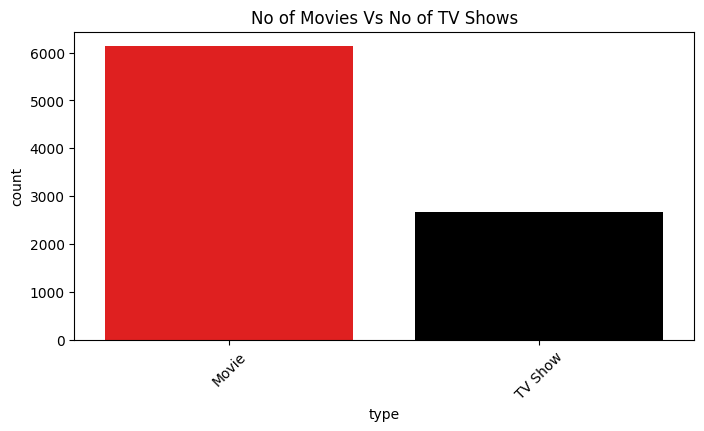

In [ ]:
color_palette={'Movie':'red','TV Show':'black'}
plt.figure(figsize=(8,4))
Type_Count=sns.countplot(data=df,x='type',palette=color_palette)
plt.xticks(rotation = 45)
plt.title('No of Movies Vs No of TV Shows')
plt.show()



Observation:

More Number of movies were added in Netflix than TV shows

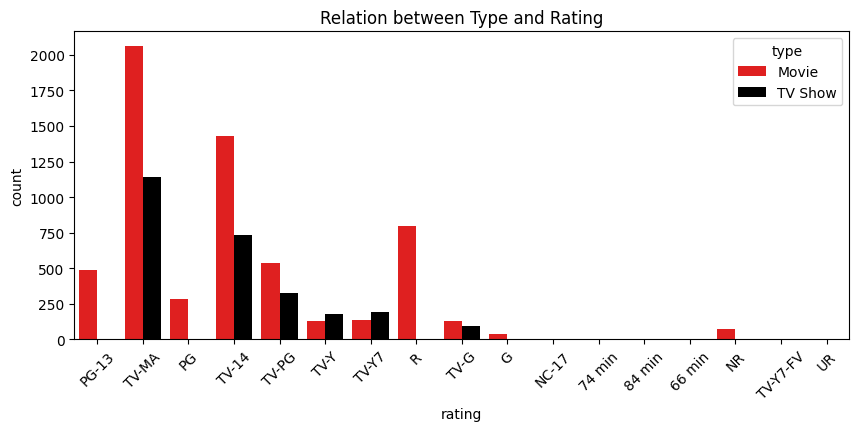

In [ ]:
color_palette={'Movie':'red','TV Show':'black'}
plt.figure(figsize=(10,4))
Type_rating=sns.countplot(data=netflix_df,x='rating',hue='type',palette=color_palette)
plt.xticks(rotation = 45)
plt.title('Relation between Type and Rating')
plt.show()

# Observations:

1.   By comparing the heights of the bars within each rating category, we can observe the relative frequency of each rating for movies and TV shows.
2.   The color palette effectively distinguishes between movies (red) and TV shows (black), making it easy to differentiate between the two types of content.
3.   The countplot reveals that the majority of ratings fall into the categories of TV-MA and TV-14
*   TV-14 - unsuitable for children under 14 years of age.
*   TV-MA - Mature Audience Only. Intended for adults and may be unsuitable for children under 17 years of age

# Distribution of movies and TV_show

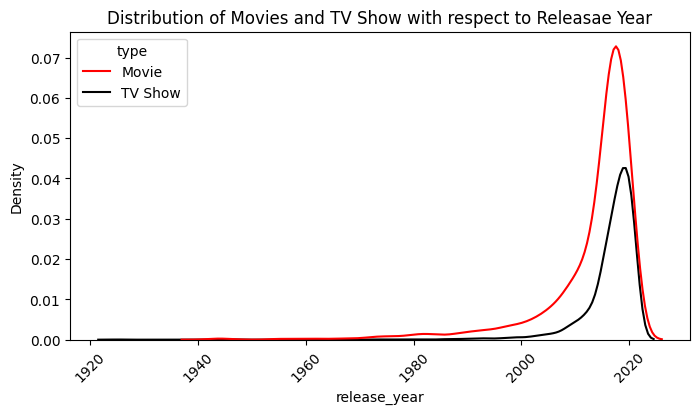

In [ ]:
plt.figure(figsize=(8,4))
movie_TVshow=sns.kdeplot(data=df,x='release_year',hue='type',palette=color_palette)
plt.xticks(rotation = 45)
plt.title('Distribution of Movies and TV Show with respect to Releasae Year')
plt.show()

# Observation:
1.   Movies are increasing approximately from the year 2008   
2.   TV_shows are increasing approximately from the year 2012



In [ ]:
df['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943])

In [ ]:
df['director']=df['director'].fillna('Unknown_Director')
df['country']=df['country'].fillna('Unknown_Country')
df['cast']=df['cast'].fillna('Unknown_Actor')
df['rating']=df['rating'].fillna('Unknown_rating')

In [ ]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

# Checking Nesting in each Column

In [ ]:
df[df['show_id'].apply(lambda x: "," in str(x))]

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description]
Index: []

In [ ]:
df[df['type'].apply(lambda x: "," in str(x))]

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description]
Index: []

In [ ]:
df[df['title'].apply(lambda x: "," in str(x))].head(2)

show_id     type                                title            director  \
10      s11  TV Show  Vendetta: Truth, Lies and The Mafia    Unknown_Director   
140    s141    Movie  El patrón, radiografía de un crimen  Sebastián Schindel   

                                                  cast               country  \
10                                       Unknown_Actor       Unknown_Country   
140  Joaquín Furriel, Luis Ziembrowski, Guillermo P...  Argentina, Venezuela   

             date_added  release_year rating  duration  \
10   September 24, 2021          2021  TV-MA  1 Season   
140   September 1, 2021          2014  TV-MA   100 min   

                                                 genre  \
10   Crime TV Shows, Docuseries, International TV S...   
140            Dramas, International Movies, Thrillers   

                                           description  
10   Sicily boasts a bold "Anti-Mafia" coalition. B...  
140  A lawyer defends an illiterate man whose explo...

In [ ]:
df[df['director'].apply(lambda x:"," in str(x))].head(2)

show_id   type                                              title  \
6       s7  Movie                   My Little Pony: A New Generation   
16     s17  Movie  Europe's Most Dangerous Man: Otto Skorzeny in ...   

                                         director  \
6                   Robert Cullen, José Luis Ucha   
16  Pedro de Echave García, Pablo Azorín Williams   

                                                 cast          country  \
6   Vanessa Hudgens, Kimiko Glenn, James Marsden, ...  Unknown_Country   
16                                      Unknown_Actor  Unknown_Country   

            date_added  release_year rating duration  \
6   September 24, 2021          2021     PG   91 min   
16  September 22, 2021          2020  TV-MA   67 min   

                                  genre  \
6              Children & Family Movies   
16  Documentaries, International Movies   

                                          description  
6   Equestria's divided. But a bright-eyed hero be...  
16  Declassified documents reveal the post-WWII li...

In [ ]:
df[df['cast'].apply(lambda x:"," in str(x))].head(2)

show_id     type          title          director  \
1      s2  TV Show  Blood & Water  Unknown_Director   
2      s3  TV Show      Ganglands   Julien Leclercq   

                                                cast          country  \
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...     South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  Unknown_Country   

           date_added  release_year rating   duration  \
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   

                                               genre  \
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   

                                         description  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...

In [ ]:
df[df['country'].apply(lambda x:"," in str(x))].head(2)

show_id   type         title             director  \
7       s8  Movie       Sankofa         Haile Gerima   
12     s13  Movie  Je Suis Karl  Christian Schwochow   

                                                 cast  \
7   Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
12  Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   

                                              country          date_added  \
7   United States, Ghana, Burkina Faso, United Kin...  September 24, 2021   
12                            Germany, Czech Republic  September 23, 2021   

    release_year rating duration  \
7           1993  TV-MA  125 min   
12          2021  TV-MA  127 min   

                                               genre  \
7   Dramas, Independent Movies, International Movies   
12                      Dramas, International Movies   

                                          description  
7   On a photo shoot in Ghana, an American model s...  
12  After most of her family is murdered in a terr...

In [ ]:
df[df['date_added'].apply(lambda x:"," in str(x))].head(2)

show_id     type                 title          director  \
0      s1    Movie  Dick Johnson Is Dead   Kirsten Johnson   
1      s2  TV Show         Blood & Water  Unknown_Director   

                                                cast        country  \
0                                      Unknown_Actor  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   

                                             genre  \
0                                    Documentaries   
1  International TV Shows, TV Dramas, TV Mysteries   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...

In [ ]:
df[df['release_year'].apply(lambda x:"," in str(x))]

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description]
Index: []

In [ ]:
df[df['rating'].apply(lambda x:"," in str(x))]

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description]
Index: []

In [ ]:
df[df['duration'].apply(lambda x:"," in str(x))]

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description]
Index: []

In [ ]:
df[df['genre'].apply(lambda x:"," in str(x))].head(2)

show_id     type          title          director  \
1      s2  TV Show  Blood & Water  Unknown_Director   
2      s3  TV Show      Ganglands   Julien Leclercq   

                                                cast          country  \
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...     South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  Unknown_Country   

           date_added  release_year rating   duration  \
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   

                                               genre  \
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   

                                         description  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...

In [ ]:
df[df['description'].apply(lambda x:"," in str(x))].head()

show_id     type                  title          director  \
0      s1    Movie   Dick Johnson Is Dead   Kirsten Johnson   
1      s2  TV Show          Blood & Water  Unknown_Director   
2      s3  TV Show              Ganglands   Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans  Unknown_Director   
4      s5  TV Show           Kota Factory  Unknown_Director   

                                                cast          country  \
0                                      Unknown_Actor    United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...     South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  Unknown_Country   
3                                      Unknown_Actor  Unknown_Country   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...            India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                               genre  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [ ]:
df.rename({'listed_in':'genre'},axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  genre         8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# Un-nesting the Columns [director,cast,country,genre]

In [ ]:
director_df=df[['title','director']]
director_df["unnested_director"]=director_df['director'].apply(lambda x: str(x).split(", "))
print(director_df)
director_df=director_df.explode("unnested_director")
director_df.head()

                      title          director   unnested_director
0      Dick Johnson Is Dead   Kirsten Johnson   [Kirsten Johnson]
1             Blood & Water  Unknown_Director  [Unknown_Director]
2                 Ganglands   Julien Leclercq   [Julien Leclercq]
3     Jailbirds New Orleans  Unknown_Director  [Unknown_Director]
4              Kota Factory  Unknown_Director  [Unknown_Director]
...                     ...               ...                 ...
8802                 Zodiac     David Fincher     [David Fincher]
8803            Zombie Dumb  Unknown_Director  [Unknown_Director]
8804             Zombieland   Ruben Fleischer   [Ruben Fleischer]
8805                   Zoom      Peter Hewitt      [Peter Hewitt]
8806                 Zubaan       Mozez Singh       [Mozez Singh]

[8807 rows x 3 columns]


title          director unnested_director
0   Dick Johnson Is Dead   Kirsten Johnson   Kirsten Johnson
1          Blood & Water  Unknown_Director  Unknown_Director
2              Ganglands   Julien Leclercq   Julien Leclercq
3  Jailbirds New Orleans  Unknown_Director  Unknown_Director
4           Kota Factory  Unknown_Director  Unknown_Director

In [ ]:
director_df.shape

(9612, 3)

In [ ]:
cast_df=df[["title","cast"]]
cast_df["unnested_cast"]=cast_df['cast'].apply(lambda x: str(x).split(", "))
cast_df=cast_df.explode("unnested_cast")
cast_df.head()

title                                               cast  \
0  Dick Johnson Is Dead                                      Unknown_Actor   
1         Blood & Water  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
1         Blood & Water  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
1         Blood & Water  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
1         Blood & Water  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   

    unnested_cast  
0   Unknown_Actor  
1      Ama Qamata  
1     Khosi Ngema  
1   Gail Mabalane  
1  Thabang Molaba

In [ ]:
cast_df.shape

In [ ]:
country_df=df[['title','country']]
country_df["unnested_country"]=country_df['country'].apply(lambda x : str(x).split(", "))
country_df=country_df.explode("unnested_country")
country_df.head()

title          country unnested_country
0   Dick Johnson Is Dead    United States    United States
1          Blood & Water     South Africa     South Africa
2              Ganglands  Unknown_Country  Unknown_Country
3  Jailbirds New Orleans  Unknown_Country  Unknown_Country
4           Kota Factory            India            India

In [ ]:
country_df.shape

(10845, 3)

In [ ]:
genre_df=df[['title','genre']]
genre_df["unnested_genre"]=genre_df["genre"].apply(lambda x:str(x).split(", "))
genre_df=genre_df.explode("unnested_genre")
genre_df.head()

title                                              genre  \
0  Dick Johnson Is Dead                                      Documentaries   
1         Blood & Water    International TV Shows, TV Dramas, TV Mysteries   
1         Blood & Water    International TV Shows, TV Dramas, TV Mysteries   
1         Blood & Water    International TV Shows, TV Dramas, TV Mysteries   
2             Ganglands  Crime TV Shows, International TV Shows, TV Act...   

           unnested_genre  
0           Documentaries  
1  International TV Shows  
1               TV Dramas  
1            TV Mysteries  
2          Crime TV Shows

In [ ]:
genre_df.shape

(19323, 3)

# Merging all unnested DataFrames

In [ ]:
new_df=pd.merge(left=df,
                right=director_df,
                on="title",
                how="inner")

In [ ]:
new_df.head(2)

show_id     type                 title        director_x  \
0      s1    Movie  Dick Johnson Is Dead   Kirsten Johnson   
1      s2  TV Show         Blood & Water  Unknown_Director   

                                                cast        country  \
0                                      Unknown_Actor  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   

                                             genre  \
0                                    Documentaries   
1  International TV Shows, TV Dramas, TV Mysteries   

                                         description        director_y  \
0  As her father nears the end of his life, filmm...   Kirsten Johnson   
1  After crossing paths at a party, a Cape Town t...  Unknown_Director   

  unnested_director  
0   Kirsten Johnson  
1  Unknown_Director

In [ ]:
new_df=pd.merge(right=new_df,
                left=cast_df,
                on='title',
                how='inner')

In [ ]:
new_df.head(2)

title                                            genre  \
0  Dick Johnson Is Dead                                    Documentaries   
1         Blood & Water  International TV Shows, TV Dramas, TV Mysteries   

         unnested_genre_x      country_x unnested_country  \
0           Documentaries  United States    United States   
1  International TV Shows   South Africa     South Africa   

                                           genre_x        unnested_genre_y  \
0                                    Documentaries           Documentaries   
1  International TV Shows, TV Dramas, TV Mysteries  International TV Shows   

                                              cast_x  unnested_cast show_id  \
0                                      Unknown_Actor  Unknown_Actor      s1   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...     Ama Qamata      s2   

   ...                                             cast_y      country_y  \
0  ...                                      Unknown_Actor  United States   
1  ...  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   

           date_added release_year rating   duration  \
0  September 25, 2021         2020  PG-13     90 min   
1  September 24, 2021         2021  TV-MA  2 Seasons   

                                           genre_y  \
0                                    Documentaries   
1  International TV Shows, TV Dramas, TV Mysteries   

                                         description        director_y  \
0  As her father nears the end of his life, filmm...   Kirsten Johnson   
1  After crossing paths at a party, a Cape Town t...  Unknown_Director   

  unnested_director  
0   Kirsten Johnson  
1  Unknown_Director  

[2 rows x 22 columns]

In [ ]:
new_df=pd.merge(right=new_df,
                left=country_df,
                on='title',
                how='inner')

In [ ]:
new_df.head(2)

title                                            genre  \
0  Dick Johnson Is Dead                                    Documentaries   
1         Blood & Water  International TV Shows, TV Dramas, TV Mysteries   

         unnested_genre_x      country_x unnested_country  \
0           Documentaries  United States    United States   
1  International TV Shows   South Africa     South Africa   

                                           genre_x        unnested_genre_y  \
0                                    Documentaries           Documentaries   
1  International TV Shows, TV Dramas, TV Mysteries  International TV Shows   

                                              cast_x  unnested_cast show_id  \
0                                      Unknown_Actor  Unknown_Actor      s1   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...     Ama Qamata      s2   

   ...                                             cast_y      country_y  \
0  ...                                      Unknown_Actor  United States   
1  ...  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   

           date_added release_year rating   duration  \
0  September 25, 2021         2020  PG-13     90 min   
1  September 24, 2021         2021  TV-MA  2 Seasons   

                                           genre_y  \
0                                    Documentaries   
1  International TV Shows, TV Dramas, TV Mysteries   

                                         description        director_y  \
0  As her father nears the end of his life, filmm...   Kirsten Johnson   
1  After crossing paths at a party, a Cape Town t...  Unknown_Director   

  unnested_director  
0   Kirsten Johnson  
1  Unknown_Director  

[2 rows x 22 columns]

In [ ]:
new_df.shape

(201991, 20)

In [ ]:
new_df=pd.merge(right=new_df,
                left=genre_df,
                on='title',
                how='inner')

In [ ]:
new_df.head()

title                                          genre_x  \
0  Dick Johnson Is Dead                                    Documentaries   
1         Blood & Water  International TV Shows, TV Dramas, TV Mysteries   
2         Blood & Water  International TV Shows, TV Dramas, TV Mysteries   
3         Blood & Water  International TV Shows, TV Dramas, TV Mysteries   
4         Blood & Water  International TV Shows, TV Dramas, TV Mysteries   

           unnested_genre      country_x unnested_country  \
0           Documentaries  United States    United States   
1  International TV Shows   South Africa     South Africa   
2  International TV Shows   South Africa     South Africa   
3  International TV Shows   South Africa     South Africa   
4  International TV Shows   South Africa     South Africa   

                                              cast_x   unnested_cast show_id  \
0                                      Unknown_Actor   Unknown_Actor      s1   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...      Ama Qamata      s2   
2  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...     Khosi Ngema      s2   
3  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   Gail Mabalane      s2   
4  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...  Thabang Molaba      s2   

      type        director_x  \
0    Movie   Kirsten Johnson   
1  TV Show  Unknown_Director   
2  TV Show  Unknown_Director   
3  TV Show  Unknown_Director   
4  TV Show  Unknown_Director   

                                              cast_y      country_y  \
0                                      Unknown_Actor  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
3  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
4  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA  2 Seasons   
3  September 24, 2021          2021  TV-MA  2 Seasons   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           genre_y  \
0                                    Documentaries   
1  International TV Shows, TV Dramas, TV Mysteries   
2  International TV Shows, TV Dramas, TV Mysteries   
3  International TV Shows, TV Dramas, TV Mysteries   
4  International TV Shows, TV Dramas, TV Mysteries   

                                         description        director_y  \
0  As her father nears the end of his life, filmm...   Kirsten Johnson   
1  After crossing paths at a party, a Cape Town t...  Unknown_Director   
2  After crossing paths at a party, a Cape Town t...  Unknown_Director   
3  After crossing paths at a party, a Cape Town t...  Unknown_Director   
4  After crossing paths at a party, a Cape Town t...  Unknown_Director   

  unnested_director  
0   Kirsten Johnson  
1  Unknown_Director  
2  Unknown_Director  
3  Unknown_Director  
4  Unknown_Director

In [ ]:
new_df.columns

Index(['title', 'genre_x', 'unnested_genre', 'country_x', 'unnested_country',
       'cast_x', 'unnested_cast', 'show_id', 'type', 'director_x', 'cast_y',
       'country_y', 'date_added', 'release_year', 'rating', 'duration',
       'genre_y', 'description', 'director_y', 'unnested_director'],
      dtype='object')

In [ ]:
nnew_df=new_df.copy()

In [ ]:
nnew_df.drop(columns=['genre_x','country_x','cast_x','director_x','genre_y','country_y','cast_y','director_y'],inplace=True)

In [ ]:
nnew_df.shape

(201991, 12)

In [ ]:
nnew_df.columns

Index(['title', 'unnested_genre', 'unnested_country', 'unnested_cast',
       'show_id', 'type', 'date_added', 'release_year', 'rating', 'duration',
       'description', 'unnested_director'],
      dtype='object')

In [ ]:
nnew_df.head()

title          unnested_genre unnested_country  \
0  Dick Johnson Is Dead           Documentaries    United States   
1         Blood & Water  International TV Shows     South Africa   
2         Blood & Water  International TV Shows     South Africa   
3         Blood & Water  International TV Shows     South Africa   
4         Blood & Water  International TV Shows     South Africa   

    unnested_cast show_id     type          date_added  release_year rating  \
0   Unknown_Actor      s1    Movie  September 25, 2021          2020  PG-13   
1      Ama Qamata      s2  TV Show  September 24, 2021          2021  TV-MA   
2     Khosi Ngema      s2  TV Show  September 24, 2021          2021  TV-MA   
3   Gail Mabalane      s2  TV Show  September 24, 2021          2021  TV-MA   
4  Thabang Molaba      s2  TV Show  September 24, 2021          2021  TV-MA   

    duration                                        description  \
0     90 min  As her father nears the end of his life, filmm...   
1  2 Seasons  After crossing paths at a party, a Cape Town t...   
2  2 Seasons  After crossing paths at a party, a Cape Town t...   
3  2 Seasons  After crossing paths at a party, a Cape Town t...   
4  2 Seasons  After crossing paths at a party, a Cape Town t...   

  unnested_director  
0   Kirsten Johnson  
1  Unknown_Director  
2  Unknown_Director  
3  Unknown_Director  
4  Unknown_Director

In [ ]:
nnew_df.shape

(201991, 12)

In [ ]:
nnew_df.duplicated().sum()

55

In [ ]:
nnew_df.drop_duplicates(keep='first',inplace=True)

In [ ]:
nnew_df.shape

(201936, 12)

In [ ]:
n_df=nnew_df.copy()

In [ ]:
n_df.head(2)

title          unnested_genre unnested_country  \
0  Dick Johnson Is Dead           Documentaries    United States   
1         Blood & Water  International TV Shows     South Africa   

   unnested_cast show_id     type          date_added  release_year rating  \
0  Unknown_Actor      s1    Movie  September 25, 2021          2020  PG-13   
1     Ama Qamata      s2  TV Show  September 24, 2021          2021  TV-MA   

    duration                                        description  \
0     90 min  As her father nears the end of his life, filmm...   
1  2 Seasons  After crossing paths at a party, a Cape Town t...   

  unnested_director  
0   Kirsten Johnson  
1  Unknown_Director

In [ ]:
n_df.rename({'unnested_genre':'genre','unnested_country':'country','unnested_director':'director','unnested_cast':'cast'},axis=1,inplace=True)

In [ ]:
n_df.head(2)

title                   genre        country           cast  \
0  Dick Johnson Is Dead           Documentaries  United States  Unknown_Actor   
1         Blood & Water  International TV Shows   South Africa     Ama Qamata   

  show_id     type          date_added  release_year rating   duration  \
0      s1    Movie  September 25, 2021          2020  PG-13     90 min   
1      s2  TV Show  September 24, 2021          2021  TV-MA  2 Seasons   

                                         description          director  
0  As her father nears the end of his life, filmm...   Kirsten Johnson  
1  After crossing paths at a party, a Cape Town t...  Unknown_Director

In [ ]:
n_df.shape

(201936, 12)

In [ ]:
n_df.isnull().sum()

title             0
genre             0
country           0
cast              0
show_id           0
type              0
date_added      158
release_year      0
rating            0
duration          0
description       0
director          0
dtype: int64

In [ ]:
n_df.groupby('country')['title'].value_counts()

country       title                           
              Eyes of a Thief                     24
              D.P.                                 8
Afghanistan   The Land of the Enlightened          2
Albania       Forgive Us Our Debts                 8
Algeria       Alexandria ... Why?                 33
                                                  ..
West Germany  Monty Python's Fliegender Zirkus    12
              Hitler - A Career                    4
Zimbabwe      Cook Off                            36
              Trophy                               4
              Democrats                            2
Name: count, Length: 10845, dtype: int64

In [ ]:
n_df.groupby('country')['genre'].value_counts()

country       genre                 
              International Movies       8
              Dramas                     8
              Independent Movies         8
              International TV Shows     4
              TV Dramas                  4
                                        ..
West Germany  Documentaries              2
Zimbabwe      International Movies      15
              Comedies                  12
              Romantic Movies           12
              Documentaries              3
Name: count, Length: 1464, dtype: int64

In [ ]:
# Convert "release_year" to datetime format
n_df['release_year']=pd.to_datetime(n_df['release_year'],format='%Y')
# Format "release_year" as "Month Day, Year"
formatted_release_year=n_df['release_year'].dt.strftime("%B %b, %Y")
# Fill missing values in "date_added" column with formatted release year
n_df['date_added'].fillna(formatted_release_year,inplace=True)

In [ ]:
n_df.isnull().sum()

title           0
genre           0
country         0
cast            0
show_id         0
type            0
date_added      0
release_year    0
rating          0
duration        0
description     0
director        0
dtype: int64

Creating new table for Movies and TV Show

In [ ]:
Movies=n_df[n_df['type']=='Movie']

In [ ]:
Movies.head()

title                     genre  \
0                Dick Johnson Is Dead             Documentaries   
159  My Little Pony: A New Generation  Children & Family Movies   
160  My Little Pony: A New Generation  Children & Family Movies   
161  My Little Pony: A New Generation  Children & Family Movies   
162  My Little Pony: A New Generation  Children & Family Movies   

             country             cast show_id   type          date_added  \
0      United States    Unknown_Actor      s1  Movie  September 25, 2021   
159  Unknown_Country  Vanessa Hudgens      s7  Movie  September 24, 2021   
160  Unknown_Country  Vanessa Hudgens      s7  Movie  September 24, 2021   
161  Unknown_Country     Kimiko Glenn      s7  Movie  September 24, 2021   
162  Unknown_Country     Kimiko Glenn      s7  Movie  September 24, 2021   

    release_year rating duration  \
0     2020-01-01  PG-13   90 min   
159   2021-01-01     PG   91 min   
160   2021-01-01     PG   91 min   
161   2021-01-01     PG   91 min   
162   2021-01-01     PG   91 min   

                                           description         director  
0    As her father nears the end of his life, filmm...  Kirsten Johnson  
159  Equestria's divided. But a bright-eyed hero be...    Robert Cullen  
160  Equestria's divided. But a bright-eyed hero be...   José Luis Ucha  
161  Equestria's divided. But a bright-eyed hero be...    Robert Cullen  
162  Equestria's divided. But a bright-eyed hero be...   José Luis Ucha

In [ ]:
Movies.shape

(145788, 12)

In [ ]:
Movies.duplicated().sum()

0

In [ ]:
TV_Show=n_df[n_df['type']=='TV Show']

In [ ]:
TV_Show.head()

title                   genre       country              cast  \
1  Blood & Water  International TV Shows  South Africa        Ama Qamata   
2  Blood & Water  International TV Shows  South Africa       Khosi Ngema   
3  Blood & Water  International TV Shows  South Africa     Gail Mabalane   
4  Blood & Water  International TV Shows  South Africa    Thabang Molaba   
5  Blood & Water  International TV Shows  South Africa  Dillon Windvogel   

  show_id     type          date_added release_year rating   duration  \
1      s2  TV Show  September 24, 2021   2021-01-01  TV-MA  2 Seasons   
2      s2  TV Show  September 24, 2021   2021-01-01  TV-MA  2 Seasons   
3      s2  TV Show  September 24, 2021   2021-01-01  TV-MA  2 Seasons   
4      s2  TV Show  September 24, 2021   2021-01-01  TV-MA  2 Seasons   
5      s2  TV Show  September 24, 2021   2021-01-01  TV-MA  2 Seasons   

                                         description          director  
1  After crossing paths at a party, a Cape Town t...  Unknown_Director  
2  After crossing paths at a party, a Cape Town t...  Unknown_Director  
3  After crossing paths at a party, a Cape Town t...  Unknown_Director  
4  After crossing paths at a party, a Cape Town t...  Unknown_Director  
5  After crossing paths at a party, a Cape Town t...  Unknown_Director

In [ ]:
n_df.duplicated().sum()

0

In [ ]:
n_df['country'].replace("",'Unknown_Country',inplace=True)

# Type of content is available in different countries

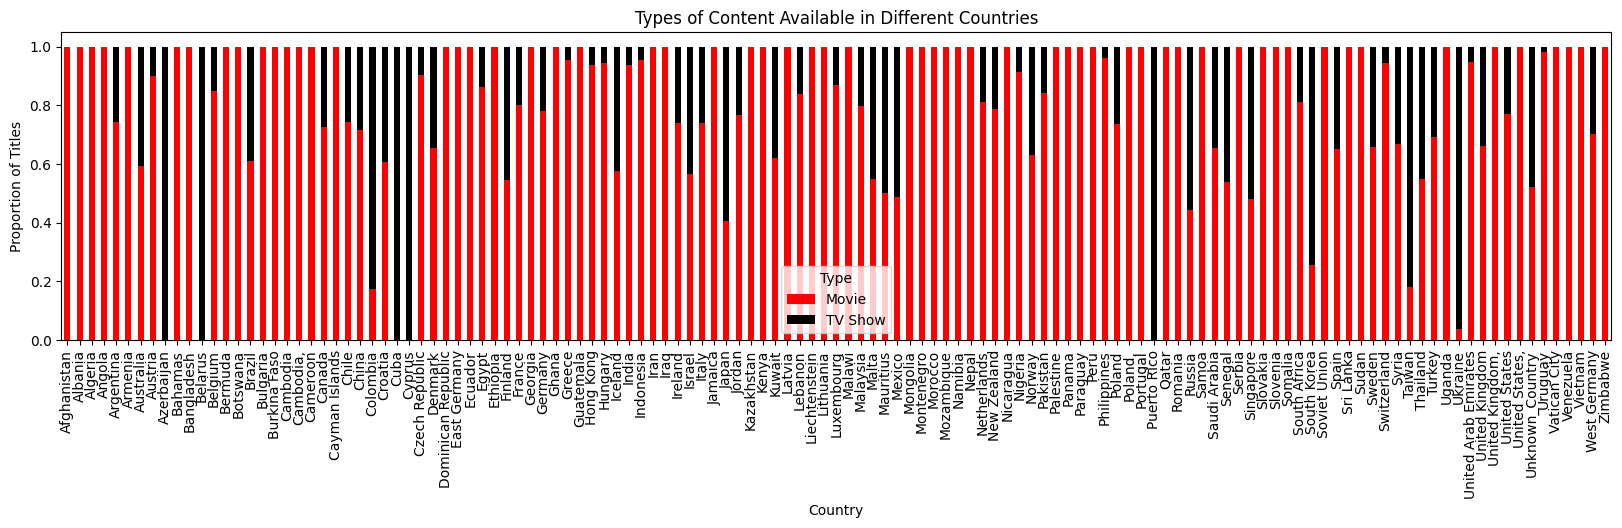

In [ ]:
# Group by country and count the number of movies and TV shows
content_by_country = n_df.groupby(['country', 'type']).size().unstack(fill_value=0)

# Normalize the data (calculate proportions)
content_by_country['Total'] = content_by_country['Movie'] + content_by_country['TV Show']
content_by_country['Movie'] /= content_by_country['Total']
content_by_country['TV Show'] /= content_by_country['Total']

# Plot the stacked bar chart
color_palette={'Movie':'red','TV Show':'black'}
content_by_country[['Movie', 'TV Show']].plot(kind='bar', stacked=True, figsize=(20, 4),color=color_palette)
plt.title('Types of Content Available in Different Countries')
plt.xlabel('Country')
plt.ylabel('Proportion of Titles')
plt.xticks(rotation=90)
plt.legend(title='Type')
plt.show()

Observation:


The plot illustrates the distribution of movie and TV show content across different countries. Each bar represents a country, with the proportion of movies and TV shows stacked within each bar.

In [ ]:
content_by_country = n_df.groupby(['country', 'type']).size().unstack(fill_value=0).reset_index()

In [ ]:
content_by_country

type       country  Movie  TV Show
0      Afghanistan      2        0
1          Albania      8        0
2          Algeria     77        0
3           Angola     32        0
4        Argentina   1325      455
..             ...    ...      ...
122   Vatican City      3        0
123      Venezuela     28        0
124        Vietnam    134        0
125   West Germany     64       27
126       Zimbabwe     42        0

[127 rows x 3 columns]

In [ ]:
genre_by_country = n_df.groupby(['country', 'genre']).size().unstack(fill_value=0).reset_index()

In [ ]:
genre_by_country

genre       country  Action & Adventure  Anime Features  Anime Series  \
0       Afghanistan                   0               0             0   
1           Albania                   0               0             0   
2           Algeria                   0               0             0   
3            Angola                  16               0             0   
4         Argentina                  41               0             0   
..              ...                 ...             ...           ...   
122    Vatican City                   0               0             0   
123       Venezuela                   0               0             0   
124         Vietnam                  11               0             0   
125    West Germany                   0               0             0   
126        Zimbabwe                   0               0             0   

genre  British TV Shows  Children & Family Movies  Classic & Cult TV  \
0                     0                         0                  0   
1                     0                         0                  0   
2                     0                         0                  0   
3                     0                         0                  0   
4                     0                        45                 10   
..                  ...                       ...                ...   
122                   0                         0                  0   
123                   0                         0                  0   
124                   0                         0                  0   
125                   0                        10                  0   
126                   0                         0                  0   

genre  Classic Movies  Comedies  Crime TV Shows  ...  TV Action & Adventure  \
0                   0         0               0  ...                      0   
1                   0         0               0  ...                      0   
2                  11         0               0  ...                      0   
3                   0         0               0  ...                      0   
4                  10       139              75  ...                      0   
..                ...       ...             ...  ...                    ...   
122                 0         0               0  ...                      0   
123                 0         0               0  ...                      0   
124                 0        10               0  ...                      0   
125                10        10               0  ...                      0   
126                 0        12               0  ...                      0   

genre  TV Comedies  TV Dramas  TV Horror  TV Mysteries  TV Sci-Fi & Fantasy  \
0                0          0          0             0                    0   
1                0          0          0             0                    0   
2                0          0          0             0                    0   
3                0          0          0             0                    0   
4               11         19          8             0                    0   
..             ...        ...        ...           ...                  ...   
122              0          0          0             0                    0   
123              0          0          0             0                    0   
124              0          0          0             0                    0   
125              6         15          0             0                    0   
126              0          0          0             0                    0   

genre  TV Shows  TV Thrillers  Teen TV Shows  Thrillers  
0             0             0              0          0  
1             0             0              0          0  
2             0             0              0          0  
3             0             0              0          0  
4             0             0             11         64  
..          

In [ ]:
df_year=n_df.groupby(['release_year']).agg({"title":"nunique"}).reset_index()
df_year

release_year  title
0    1925-01-01      1
1    1942-01-01      2
2    1943-01-01      3
3    1944-01-01      3
4    1945-01-01      4
..          ...    ...
69   2017-01-01   1032
70   2018-01-01   1147
71   2019-01-01   1030
72   2020-01-01    953
73   2021-01-01    592

[74 rows x 2 columns]

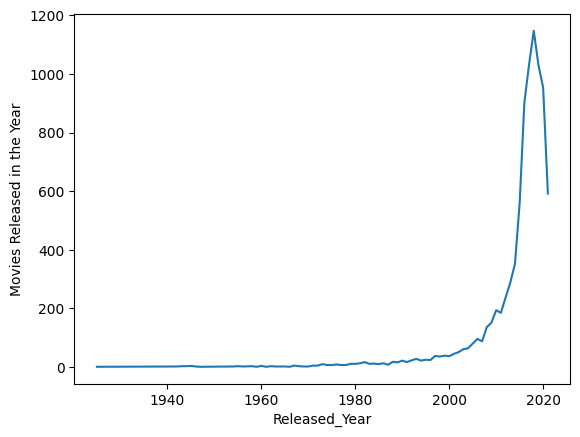

In [ ]:
df_year=n_df.groupby(['release_year']).agg({"title":"nunique"}).reset_index()
yeartrend=sns.lineplot(data=df_year, x='release_year', y='title')
plt.ylabel("Movies Released in the Year")
plt.xlabel("Released_Year")
plt.show()


Observation:


The availability of content on Netflix has experienced steady growth since 2008, with a notable surge in new releases after 2015. However, this upward trend was interrupted and experienced a decline during and after the COVID-19 pandemic.

In [ ]:
n_df['duration'].value_counts()

duration
1 Season     35035
2 Seasons     9559
3 Seasons     5084
94 min        4343
106 min       4040
             ...  
3 min            4
5 min            3
11 min           2
8 min            2
9 min            2
Name: count, Length: 220, dtype: int64

In [ ]:
df_genre=n_df.groupby(['genre','type']).agg({"title":"nunique"}).reset_index()

In [ ]:
df_genre

genre     type  title
0             Action & Adventure    Movie    859
1                 Anime Features    Movie     71
2                   Anime Series  TV Show    176
3               British TV Shows  TV Show    253
4       Children & Family Movies    Movie    641
5              Classic & Cult TV  TV Show     28
6                 Classic Movies    Movie    116
7                       Comedies    Movie   1674
8                 Crime TV Shows  TV Show    470
9                    Cult Movies    Movie     71
10                 Documentaries    Movie    869
11                    Docuseries  TV Show    395
12                        Dramas    Movie   2427
13          Faith & Spirituality    Movie     65
14                 Horror Movies    Movie    357
15            Independent Movies    Movie    756
16          International Movies    Movie   2752
17        International TV Shows  TV Show   1351
18                      Kids' TV  TV Show    451
19               Korean TV Shows  TV Show    151
20                  LGBTQ Movies    Movie    102
21                        Movies    Movie     57
22              Music & Musicals    Movie    375
23                    Reality TV  TV Show    255
24               Romantic Movies    Movie    616
25             Romantic TV Shows  TV Show    370
26              Sci-Fi & Fantasy    Movie    243
27           Science & Nature TV  TV Show     92
28     Spanish-Language TV Shows  TV Show    174
29                 Sports Movies    Movie    219
30               Stand-Up Comedy    Movie    343
31  Stand-Up Comedy & Talk Shows  TV Show     56
32         TV Action & Adventure  TV Show    168
33                   TV Comedies  TV Show    581
34                     TV Dramas  TV Show    763
35                     TV Horror  TV Show     75
36                  TV Mysteries  TV Show     98
37           TV Sci-Fi & Fantasy  TV Show     84
38                      TV Shows  TV Show     16
39                  TV Thrillers  TV Show     57
40                 Teen TV Shows  TV Show     69
41                     Thrillers    Movie    577

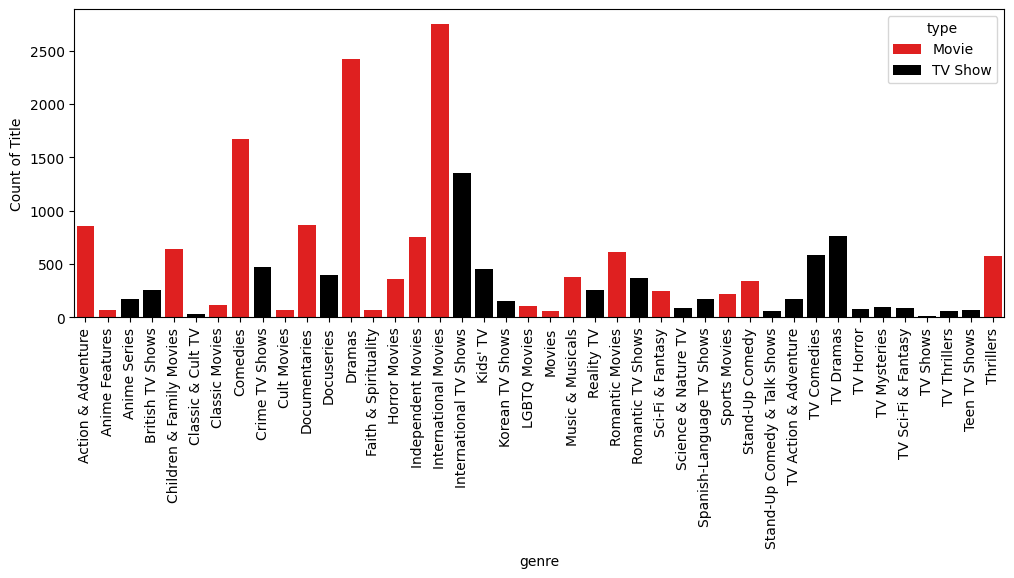

In [ ]:
color_palette={'Movie':'red','TV Show':'black'}
plt.figure(figsize=(12,4))
genre_count=sns.barplot(data=df_genre,x='genre',y='title',hue='type',palette=color_palette)
plt.xticks(rotation=90)
plt.ylabel("Count of Title")
plt.show()

Observation:


International productions, dramas, and comedies play significant roles in shaping both the movie and TV show landscapes. These genres contribute significantly to the diversity and richness of content available across various platforms, capturing the attention of audiences worldwide.

In [ ]:
type_df=n_df.groupby(['type']).agg({'title':'nunique'}).reset_index()
type_df

type  title
0    Movie   6131
1  TV Show   2676

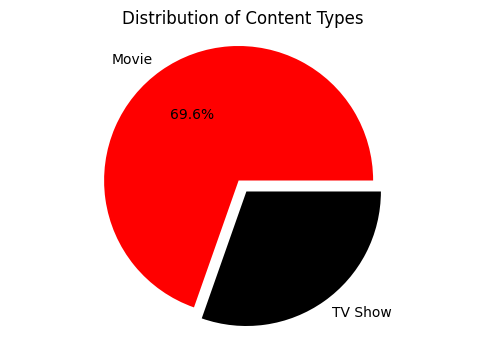

In [ ]:
color_palette={'Movie':'red','TV Show':'black'}
plt.figure(figsize=(6, 4))
plt.pie(type_df['title'], labels=type_df['type'], autopct='%1.1f%%', startangle=0,explode=(0.05,0.05),colors=['red','black'])
plt.title('Distribution of Content Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

Observation:


In our dataset, movies constitute roughly 70% of the content, while TV shows make up the remaining 30%.

In [ ]:
c_df=n_df.groupby(['country']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
c_df=c_df[c_df['country']!='Unknown_Country']
c_df

country  title
118   United States   3689
46            India   1046
116  United Kingdom    804
21           Canada    445
37           France    393
..              ...    ...
100         Somalia      1
77        Nicaragua      1
35         Ethiopia      1
33          Ecuador      1
0       Afghanistan      1

[126 rows x 2 columns]

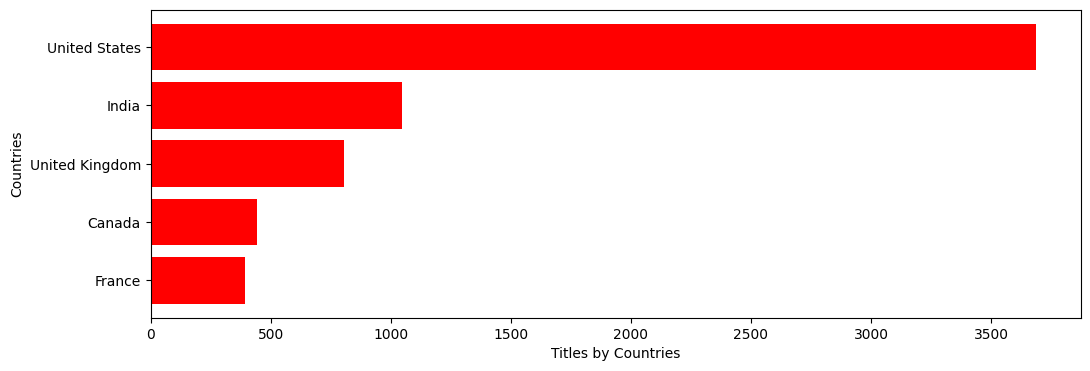

In [ ]:
c_df=n_df.groupby(['country']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:6]
c_df=c_df[c_df['country']!='Unknown_Country']
plt.figure(figsize=(12,4))
plt.barh(c_df[::-1]['country'],c_df[::-1]['title'],color='red')
plt.xlabel('Titles by Countries')
plt.ylabel('Countries')
plt.show()

Observation:

The top five countries contributing to content creation on Netflix, in order of prominence, are the United States, India, the United Kingdom, Canada, and France. These nations lead in generating a diverse array of titles available on the platform, highlighting their significant roles in shaping the global landscape of Netflix content.

In [ ]:
n_df.columns

Index(['title', 'genre', 'country', 'cast', 'show_id', 'type', 'date_added',
       'release_year', 'rating', 'duration', 'description', 'director'],
      dtype='object')

In [ ]:
r_df=n_df.groupby(['rating']).agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)

In [ ]:
r_df

rating  title
8            TV-MA   3207
6            TV-14   2160
9            TV-PG    863
5                R    799
4            PG-13    490
11           TV-Y7    334
10            TV-Y    307
3               PG    287
7             TV-G    220
2               NR     80
0                G     41
14  Unknown_rating      7
12        TV-Y7-FV      6
1            NC-17      3
13              UR      3

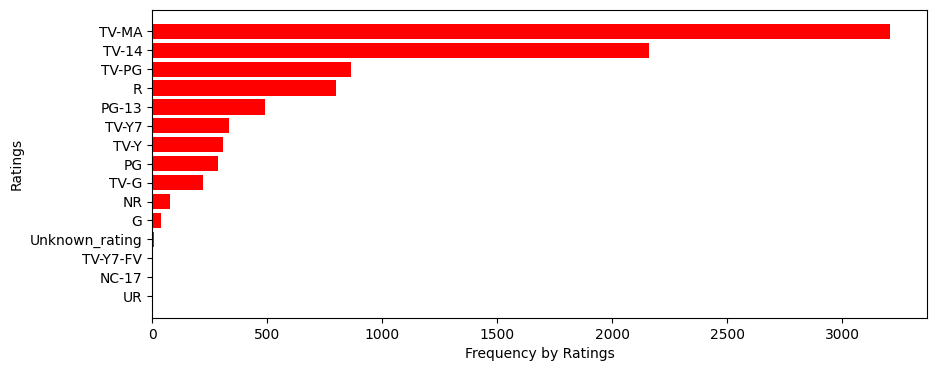

In [ ]:
df_rating=n_df.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(10,4))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['red'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

Observation:


The majority of content available on Netflix is geared towards mature audiences, featuring R-rated material and content not suitable for viewers under the age of 14 without parental guidance. This indicates that a significant portion of Netflix's catalog caters to older viewers and may contain themes, language, or scenes that are more suitable for adult audiences.

In [ ]:
Movies.head(2)

title                     genre  \
0                Dick Johnson Is Dead             Documentaries   
159  My Little Pony: A New Generation  Children & Family Movies   

             country             cast show_id   type          date_added  \
0      United States    Unknown_Actor      s1  Movie  September 25, 2021   
159  Unknown_Country  Vanessa Hudgens      s7  Movie  September 24, 2021   

    release_year rating duration  \
0     2020-01-01  PG-13   90 min   
159   2021-01-01     PG   91 min   

                                           description         director  
0    As her father nears the end of his life, filmm...  Kirsten Johnson  
159  Equestria's divided. But a bright-eyed hero be...    Robert Cullen

In [ ]:
TV_Show.head(2)

title                   genre       country         cast show_id  \
1  Blood & Water  International TV Shows  South Africa   Ama Qamata      s2   
2  Blood & Water  International TV Shows  South Africa  Khosi Ngema      s2   

      type          date_added release_year rating   duration  \
1  TV Show  September 24, 2021   2021-01-01  TV-MA  2 Seasons   
2  TV Show  September 24, 2021   2021-01-01  TV-MA  2 Seasons   

                                         description          director  
1  After crossing paths at a party, a Cape Town t...  Unknown_Director  
2  After crossing paths at a party, a Cape Town t...  Unknown_Director

# Top 5 Analysis on Movies

In [ ]:
G=Movies.groupby(['genre'])[['show_id']].nunique().reset_index()

In [ ]:
G.sort_values(by='show_id',ascending=False).head(5)

genre  show_id
11  International Movies     2752
7                 Dramas     2427
4               Comedies     1674
6          Documentaries      869
0     Action & Adventure      859

In [ ]:
Movies['country'].replace("","Unknown_Country",inplace=True)

In [ ]:
C=Movies.groupby(['country'])[['show_id']].nunique().reset_index().sort_values(by='show_id',ascending=False).head(5)

In [ ]:
C

country  show_id
113    United States     2751
42             India      962
111   United Kingdom      532
115  Unknown_Country      441
19            Canada      319

In [ ]:
R=Movies.groupby(['rating'])[['show_id']].nunique().reset_index().sort_values(by='show_id',ascending=False).head(5)
R

rating  show_id
8  TV-MA     2062
6  TV-14     1427
5      R      797
9  TV-PG      540
4  PG-13      490

In [ ]:
D=Movies.groupby(['director'])[['show_id']].nunique().reset_index().sort_values(by='show_id',ascending=False).head(5)
D

director  show_id
4539  Unknown_Director      188
3582     Rajiv Chilaka       22
1817         Jan Suter       21
3633       Raúl Campos       19
4261       Suhas Kadav       16

In [ ]:
A=Movies.groupby(['cast'])[['show_id']].nunique().reset_index().sort_values(by='show_id',ascending=False).head(5)
A

cast  show_id
24460     Unknown_Actor      475
2105        Anupam Kher       42
21781    Shah Rukh Khan       35
17193  Naseeruddin Shah       32
18064           Om Puri       30

Text(0.5, 1.0, 'Top 5 Movie Actors')

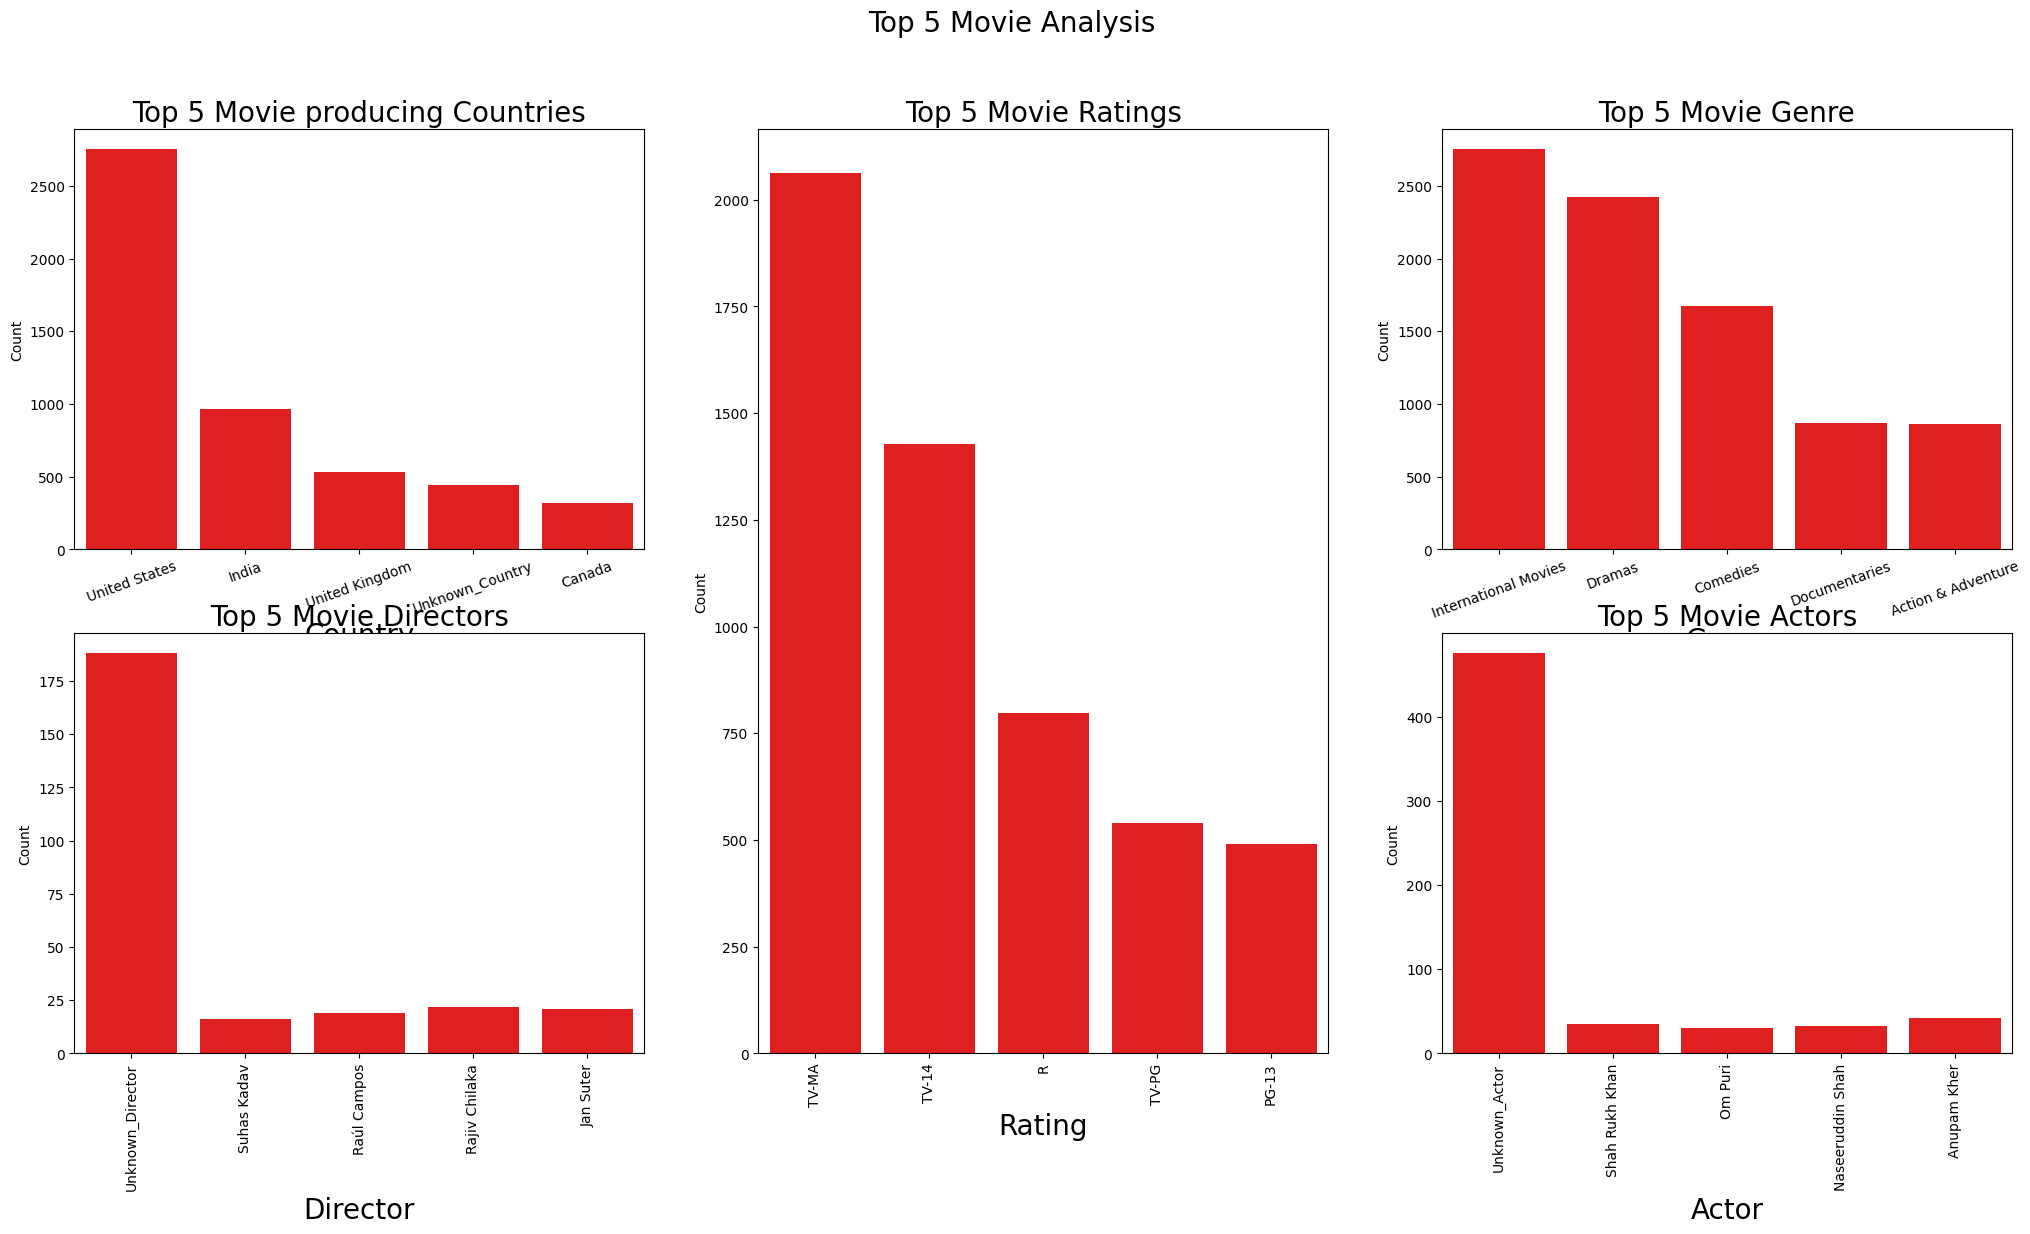

In [ ]:
plt.figure(figsize=(25,12)).suptitle("Top 5 Movie Analysis",fontsize=20)
#Country
plt.subplot(2,3,1)
sns.barplot(C.sort_values(by='show_id',ascending=False).head(5),x='country',y='show_id',color='red')
plt.xticks(rotation=20)
plt.xlabel('Country',fontsize=20)
plt.ylabel('Count')
plt.title('Top 5 Movie producing Countries',fontsize=20)
#Genre
plt.subplot(2,3,3)
sns.barplot(G.sort_values(by='show_id',ascending=False).head(5),x='genre',y='show_id',color='red')
plt.xticks(rotation=20)
plt.xlabel('Genre',fontsize=20)
plt.ylabel('Count')
plt.title('Top 5 Movie Genre',fontsize=20)
#Rating
plt.subplot(1,3,2)
sns.barplot(R.sort_values(by='show_id',ascending=False).head(5),x='rating',y='show_id',color='red')
plt.xticks(rotation=90)
plt.xlabel('Rating',fontsize=20)
plt.ylabel('Count')
plt.title('Top 5 Movie Ratings',fontsize=20)
#Director
plt.subplot(2,3,4)
sns.barplot(D.sort_values(by='director',ascending=False).head(5),x='director',y='show_id',color='red')
plt.xticks(rotation=90)
plt.xlabel('Director',fontsize=20)
plt.ylabel('Count')
plt.title('Top 5 Movie Directors',fontsize=20)
#Actor
plt.subplot(2,3,6)
sns.barplot(A.sort_values(by='cast',ascending=False).head(5),x='cast',y='show_id',color='red')
plt.xticks(rotation=90)
plt.xlabel('Actor',fontsize=20)
plt.ylabel('Count')
plt.title('Top 5 Movie Actors',fontsize=20)

# Top 5 Analysis on TV_Show

In [ ]:
ct=TV_Show.groupby(['country'])[['show_id']].nunique().reset_index().sort_values(by='show_id',ascending=False).head(5)
ct

country  show_id
63    United States      938
64  Unknown_Country      391
62   United Kingdom      272
30            Japan      199
52      South Korea      170

In [ ]:
gt=TV_Show.groupby(['genre'])[['show_id']].nunique().reset_index().sort_values(by='show_id',ascending=False).head(5)
gt

genre  show_id
5   International TV Shows     1351
15               TV Dramas      763
14             TV Comedies      581
3           Crime TV Shows      470
6                 Kids' TV      451

In [ ]:
rt=TV_Show.groupby(['rating'])[['show_id']].nunique().reset_index().sort_values(by='show_id',ascending=False).head(5)
rt

rating  show_id
4  TV-MA     1145
2  TV-14      733
5  TV-PG      323
7  TV-Y7      195
6   TV-Y      176

In [ ]:
dt=TV_Show.groupby(['director'])[['show_id']].nunique().reset_index().sort_values(by='show_id',ascending=False).head(5)
dt

director  show_id
284     Unknown_Director     2446
146            Ken Burns        3
8    Alastair Fothergill        3
259          Stan Lathan        2
128        Joe Berlinger        2

In [ ]:
at=TV_Show.groupby(['cast'])[['show_id']].nunique().reset_index().sort_values(by='show_id',ascending=False).head(5)
at

cast  show_id
13892     Unknown_Actor      350
13230  Takahiro Sakurai       25
14581         Yuki Kaji       19
6804     Junichi Suwabe       17
2874        Daisuke Ono       17

Text(0.5, 1.0, 'Top 5 TV_Show Actors')

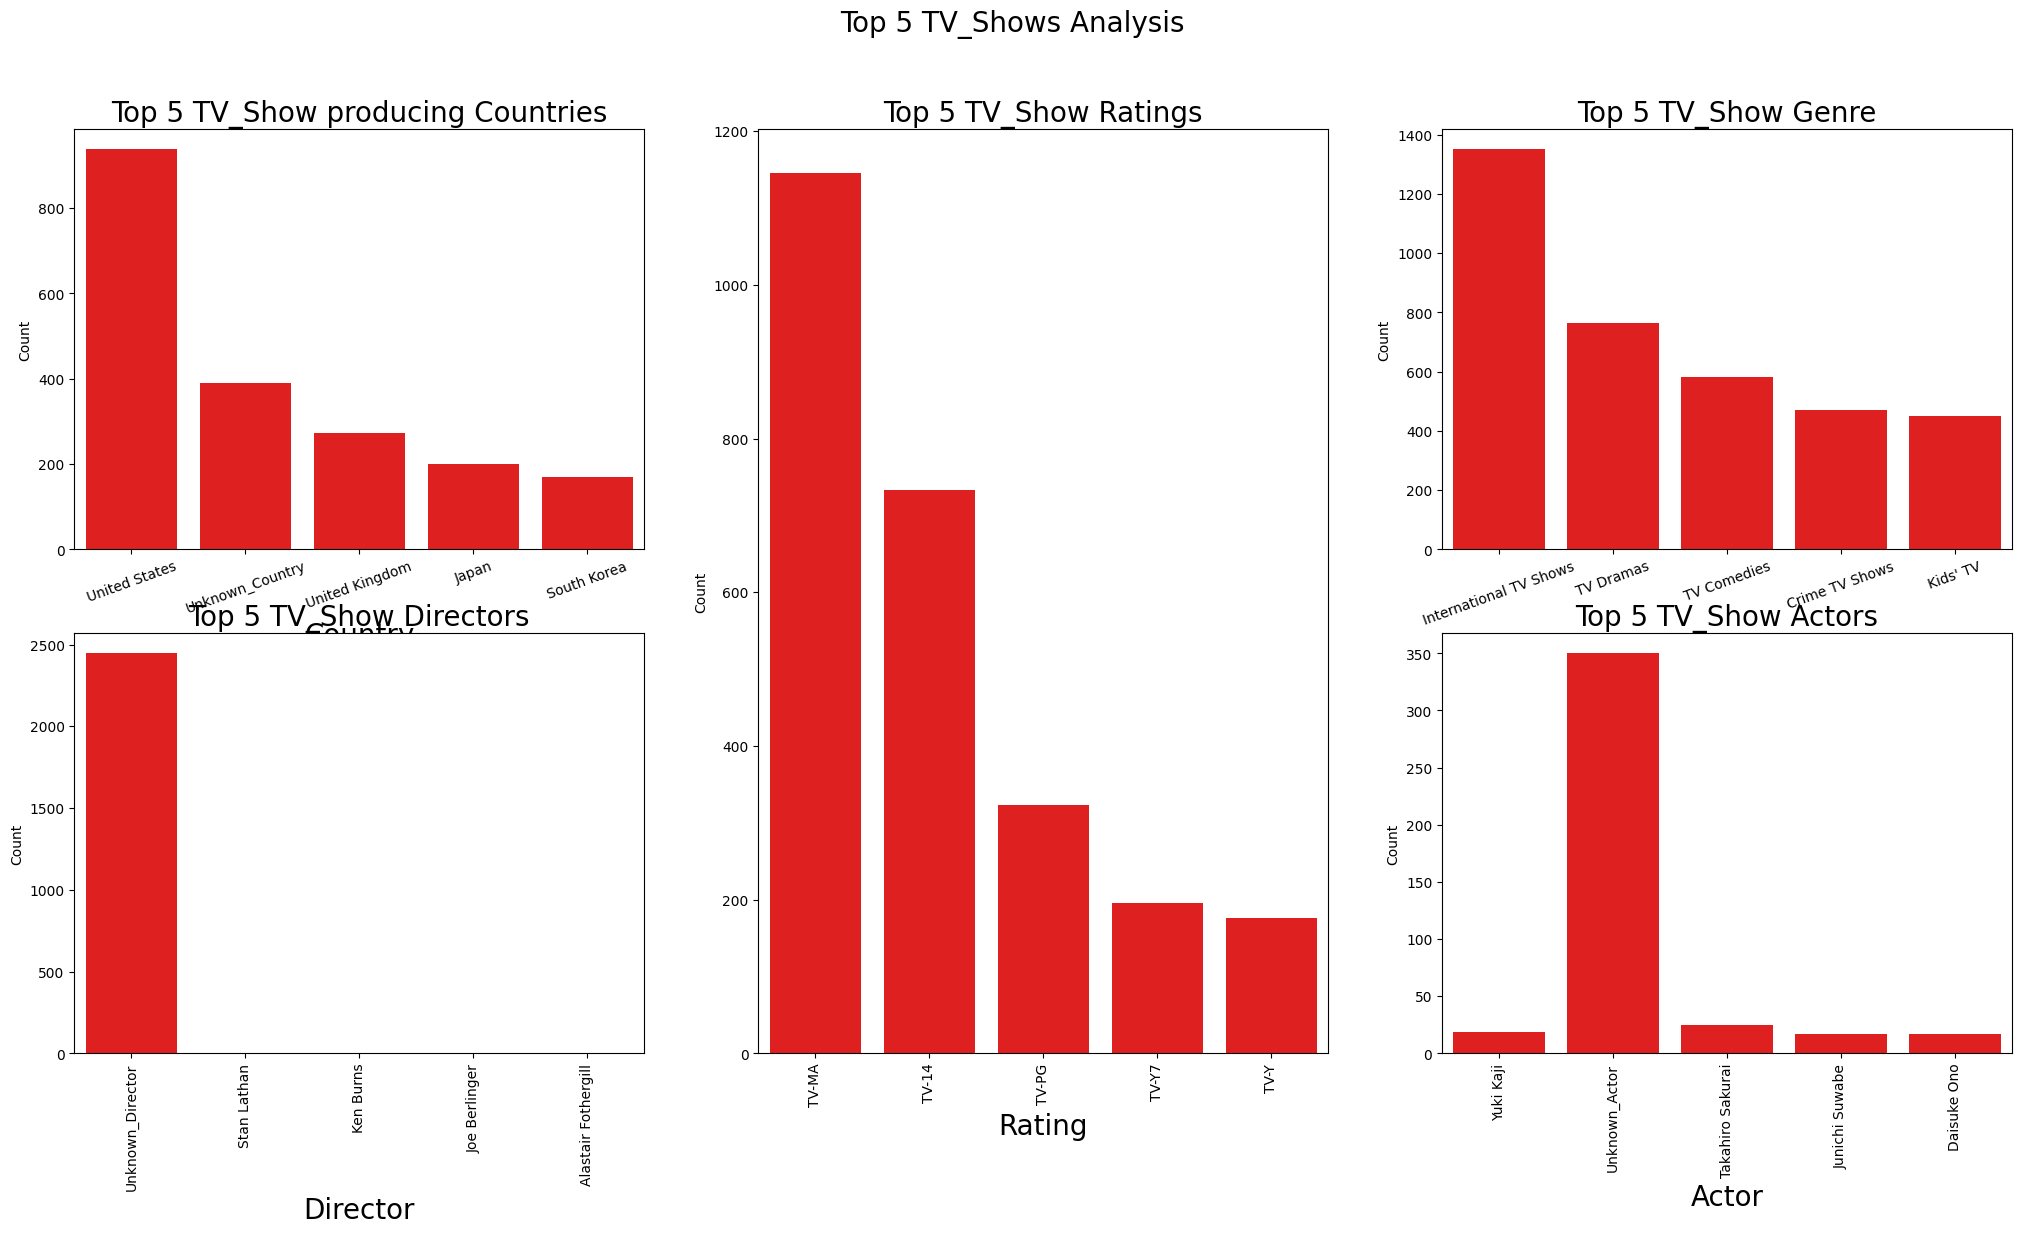

In [ ]:
plt.figure(figsize=(25,12)).suptitle("Top 5 TV_Shows Analysis",fontsize=20)
#Country
plt.subplot(2,3,1)
sns.barplot(ct.sort_values(by='show_id',ascending=False).head(5),x='country',y='show_id',color='red')
plt.xticks(rotation=20)
plt.xlabel('Country',fontsize=20)
plt.ylabel('Count')
plt.title('Top 5 TV_Show producing Countries',fontsize=20)
#Genre
plt.subplot(2,3,3)
sns.barplot(gt.sort_values(by='show_id',ascending=False).head(5),x='genre',y='show_id',color='red')
plt.xticks(rotation=20)
plt.xlabel('Genre',fontsize=20)
plt.ylabel('Count')
plt.title('Top 5 TV_Show Genre',fontsize=20)
#Rating
plt.subplot(1,3,2)
sns.barplot(rt.sort_values(by='show_id',ascending=False).head(5),x='rating',y='show_id',color='red')
plt.xticks(rotation=90)
plt.xlabel('Rating',fontsize=20)
plt.ylabel('Count')
plt.title('Top 5 TV_Show Ratings',fontsize=20)
#Director
plt.subplot(2,3,4)
sns.barplot(dt.sort_values(by='director',ascending=False).head(5),x='director',y='show_id',color='red')
plt.xticks(rotation=90)
plt.xlabel('Director',fontsize=20)
plt.ylabel('Count')
plt.title('Top 5 TV_Show Directors',fontsize=20)
#Actor
plt.subplot(2,3,6)
sns.barplot(at.sort_values(by='cast',ascending=False).head(5),x='cast',y='show_id',color='red')
plt.xticks(rotation=90)
plt.xlabel('Actor',fontsize=20)
plt.ylabel('Count')
plt.title('Top 5 TV_Show Actors',fontsize=20)

In [ ]:
Movies['date_added'] = pd.to_datetime(Movies['date_added'], errors='coerce', infer_datetime_format=True)

In [ ]:
Movies['day_added']=Movies['date_added'].dt.day
Movies['month_added']=Movies['date_added'].dt.month
Movies['year_added']=Movies['date_added'].dt.year


In [ ]:
Movies['day_name'] = Movies['date_added'].dt.strftime('%A')

In [ ]:
Movies.columns

Index(['title', 'genre', 'country', 'cast', 'show_id', 'type', 'date_added',
       'release_year', 'rating', 'duration', 'description', 'director',
       'day_added', 'month_added', 'year_added'],
      dtype='object')

# Best time to update Movies

In [ ]:
mm=Movies.groupby(Movies['date_added'].dt.strftime('%B'))[['show_id']].nunique().reset_index().sort_values(by='show_id',ascending=False)
mm

date_added  show_id
5        July      565
0       April      550
2    December      547
4     January      546
10    October      545
7       March      529
1      August      519
11  September      519
9    November      498
6        June      492
8         May      439
3    February      382

Observation:


July appears to be the optimal month for releasing movies on Netflix, based on observed trends or data analysis.

In [ ]:
Movies.groupby(['day_name'])[['show_id']].nunique().reset_index().sort_values(by='show_id',ascending=False)

day_name  show_id
0     Friday     1566
4   Thursday     1053
6  Wednesday      906
5    Tuesday      852
1     Monday      628
3     Sunday      569
2   Saturday      557

Observation:


Friday emerges as the preferred day for Netflix to introduce new movies into its catalogue, potentially reflecting strategic scheduling to coincide with peak viewing periods over the weekend.

# Best time to Update TV_Shows

In [ ]:
TV_Show['day_added']=TV_Show['date_added'].dt.day
TV_Show['month_added']=TV_Show['date_added'].dt.month
TV_Show['year_added']=TV_Show['date_added'].dt.year

In [ ]:
TV_Show.groupby(TV_Show['date_added'].dt.strftime('%B'))[['show_id']].nunique().reset_index().sort_values(by='show_id',ascending=False)

date_added  show_id
5        July      254
2    December      250
11  September      246
6        June      232
1      August      230
10    October      210
0       April      209
7       March      205
9    November      199
8         May      187
4     January      181
3    February      175

Observation:

July and December emerges as the optimal month for introducing new TV shows on Netflix, based on observed patterns.

In [ ]:
TV_Show.groupby(TV_Show['date_added'].dt.strftime('%A'))['show_id'].nunique().reset_index().sort_values(by='show_id',ascending=False)

date_added  show_id
0     Friday      910
6  Wednesday      370
4   Thursday      334
5    Tuesday      330
2   Saturday      246
1     Monday      217
3     Sunday      171

Observation:

Friday emerges as the preferred day for Netflix to introduce new TV Shows into its catalogue, potentially reflecting strategic scheduling to coincide with peak viewing periods over the weekend.

In [ ]:
Movies[['dur','n']]=Movies['duration'].str.split(" ",expand=True)

In [ ]:
Movies['dur']=Movies['dur'].astype(int)

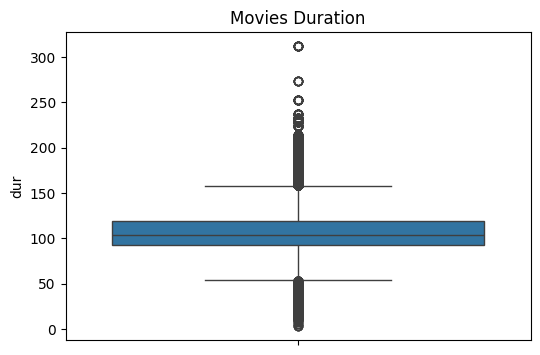

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=Movies['dur'])
plt.title('Movies Duration')
plt.show()

Observation:

The median duration of movies on Netflix is 100 minutes. This indicates that half of the movies available on the platform have a duration of 100 minutes or less, while the other half have a duration of 100 minutes or more.

In [ ]:
TV_Show[['dur','n']]=TV_Show['duration'].str.split(" ",expand=True)

In [ ]:
TV_Show['dur']=TV_Show['dur'].astype(int)

In [ ]:
TV_Show['dur'].value_counts()

dur
1     35035
2      9559
3      5084
4      2134
5      1698
7       843
6       633
8       286
9       257
10      220
13      132
12      111
15       96
17       30
11       30
Name: count, dtype: int64

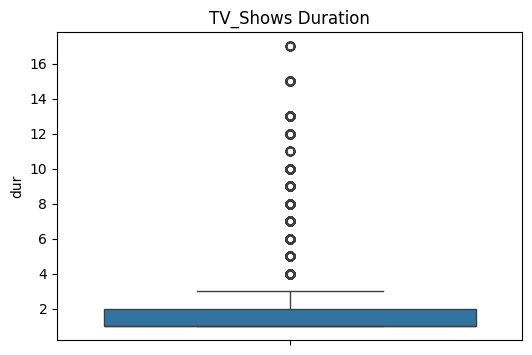

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=TV_Show['dur'])
plt.title('TV_Shows Duration')
plt.show()

Observation:

The maximum number of TV shows on Netflix contains one season. This suggests that a significant portion of TV shows available on the platform have a single season

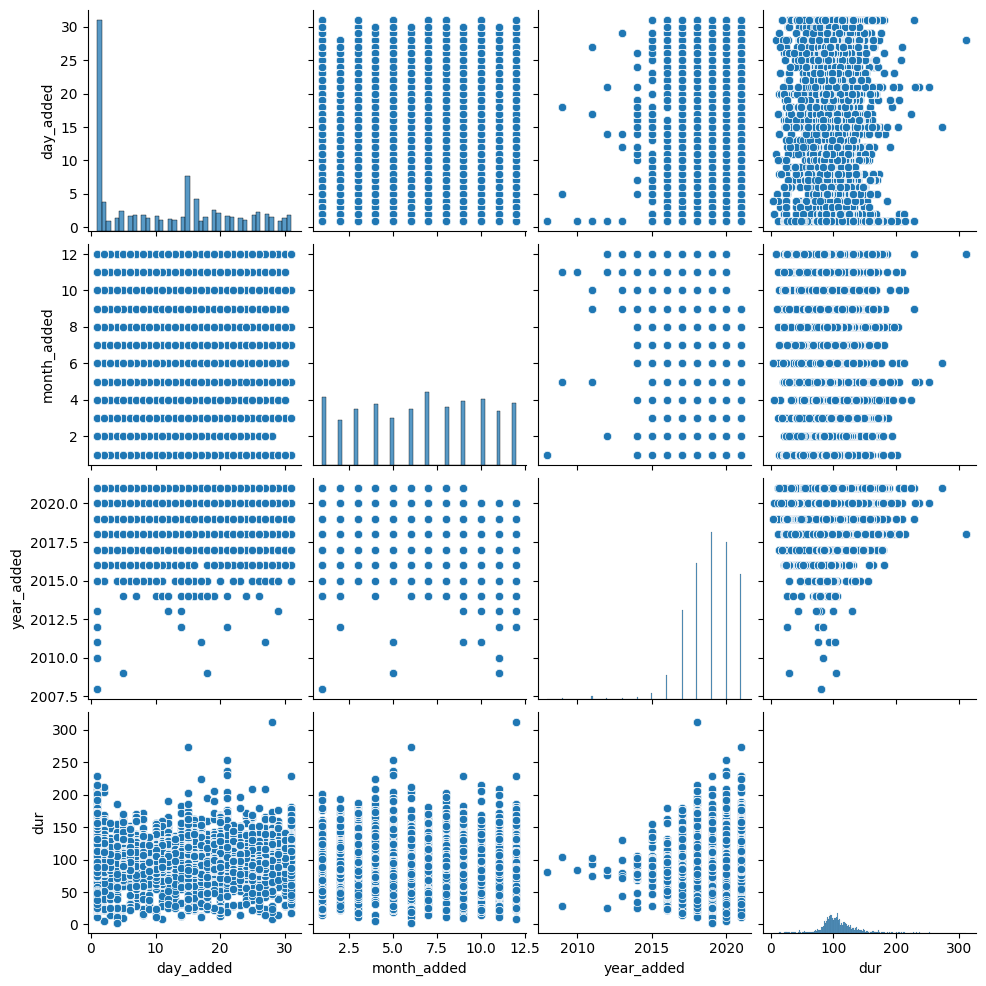

In [ ]:
sns.pairplot(data=Movies)

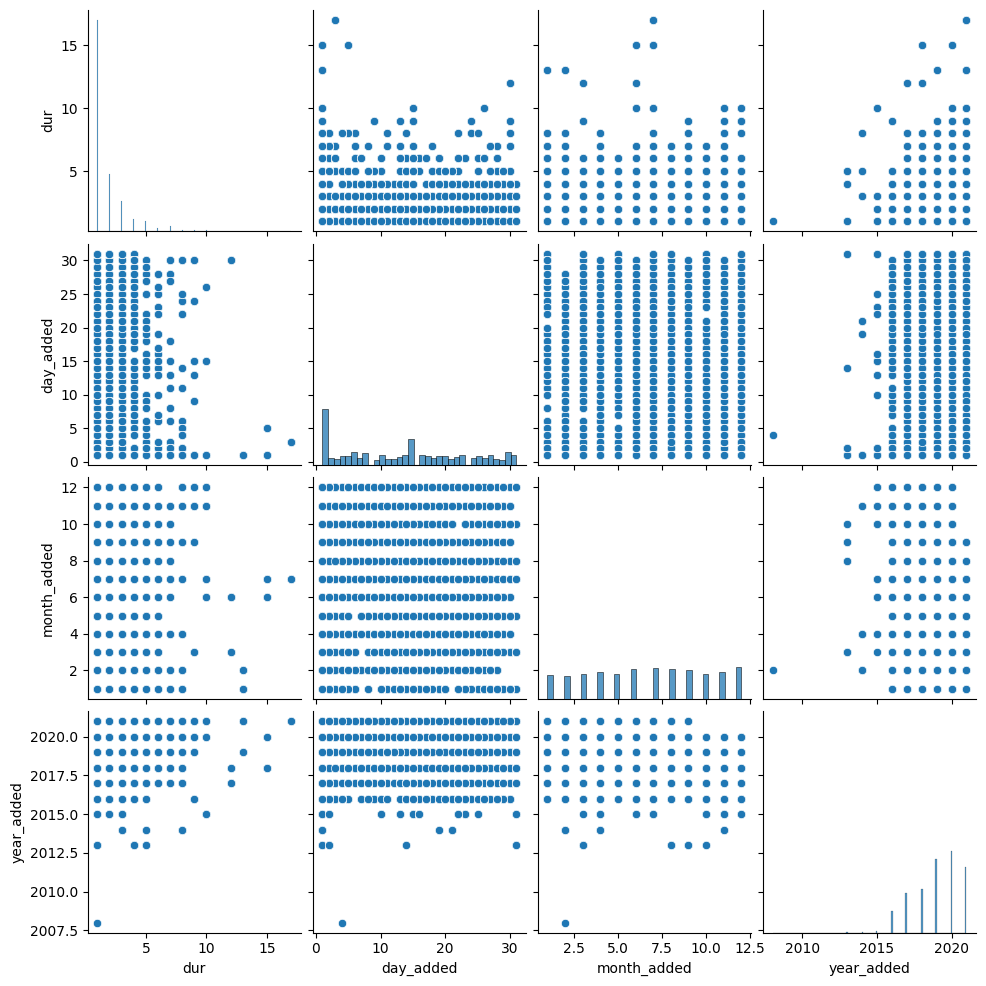

In [ ]:
sns.pairplot(data=TV_Show)

# Heat Map Analysis

In [ ]:
movies_df = Movies.select_dtypes(include=['number'])

movies_df.corr()

day_added  month_added  year_added       dur
day_added     1.000000     0.031945    0.007549 -0.050829
month_added   0.031945     1.000000   -0.170080  0.021431
year_added    0.007549    -0.170080    1.000000  0.073323
dur          -0.050829     0.021431    0.073323  1.000000

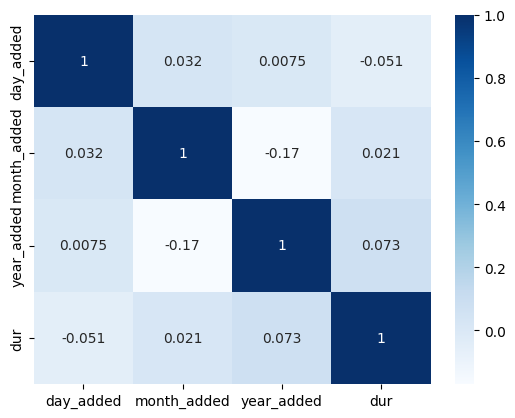

In [ ]:
sns.heatmap(movies_df.corr(), cmap= "Blues", annot=True)
plt.show()

In [ ]:
TV_df = TV_Show.select_dtypes(include=['number'])

TV_df.corr()

dur  day_added  month_added  year_added
dur          1.000000  -0.019050    -0.005063    0.097991
day_added   -0.019050   1.000000    -0.007047    0.092150
month_added -0.005063  -0.007047     1.000000   -0.169751
year_added   0.097991   0.092150    -0.169751    1.000000

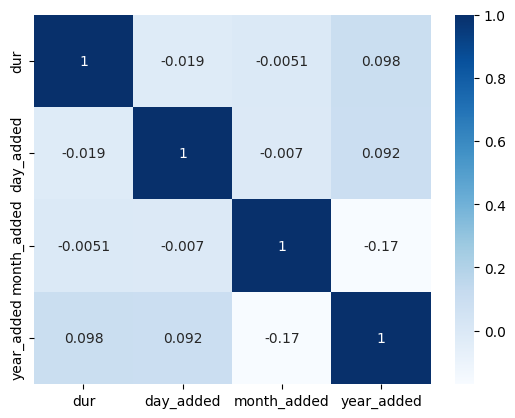

In [ ]:
sns.heatmap(TV_df.corr(), cmap= "Blues", annot=True)
plt.show()

# Insights

*   Netflix prioritizes the addition of movies over TV shows.
*   Mature content, suitable for audiences aged 14 and 17 and above, constitutes a significant portion of the movie ratings added to Netflix.
*   The majority of movies available on Netflix were released between approximately 2008 and 2022, while TV shows primarily span from around 2012 to 2022.
*   The United States emerges as the leading producer of both movies and TV shows on Netflix.
*   International movies and dramas are prevalent among the content added to Netflix.
*   Similarly, international TV shows and dramas dominate the selection of TV shows added to Netflix.
*   July and Fridays are the preferred times for adding movies to Netflix, while December and Fridays are favored for adding TV shows.
About half of the movies available on Netflix have durations ranging from 90 to 110 minutes.
*   Over time, there is a trend of decreasing movie durations in the Netflix catalog


# Recommendations:


*   To optimize audience engagement, Netflix should prioritize acquiring and promoting movies, considering their higher release frequency compared to TV shows.
*   With a considerable portion of adult-rated movies targeting audiences above the ages of 14 and 17, Netflix can strategically focus on curating and highlighting adult-oriented content to appeal to its target demographic.
*   Netflix's emphasis on acquiring and showcasing international movies and dramas aligns with the platform's popularity among diverse global audiences, indicating the importance of continued investment in sourcing content from various countries.
*   The preference for movie durations falling within the 90 to 110-minute range suggests a growing user preference for shorter film formats, suggesting an opportunity for Netflix to prioritize acquiring and promoting content that aligns with this trend.
*   By strategically scheduling new movie releases primarily in July, particularly on Fridays, Netflix can maximize viewership and capitalize on peak engagement periods.
*   Similarly, focusing on adding new TV shows in December, particularly on Fridays, can enhance viewership and capitalize on heightened user activity during the holiday season.